In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pairwise_df = pd.read_csv('data/pairwise.csv',encoding='latin-1')
pairwise_df = pairwise_df.drop(columns=['user_loc','fr_loc','sci_ranked','population_diff_ranked','trade_ranked'])

In [3]:
print(pairwise_df)

       scaled_sci  migrants_from_fr      gdp_diff  population_diff  \
0         1318515               NaN      0.000000              0.0   
1            7764               NaN  27112.375540        9673411.0   
2            2836               NaN  38554.976170        6916338.0   
3            4174               NaN  39618.866070        6812798.0   
4            2954               NaN  40549.709690       22054766.0   
...           ...               ...           ...              ...   
34220       12385               NaN           NaN              NaN   
34221       88866            7872.0    878.599360       56063740.0   
34222      137582            2806.0   3939.094354       15366500.0   
34223      326749           13413.0   3811.688259       12150938.0   
34224   115262823               NaN      0.000000              0.0   

       literacy_dif  internet_diff  hci_diff      distance  trade  
0               NaN       0.000000  0.000000      0.000095    NaN  
1               NaN    

In [6]:
pairwise_df = pairwise_df[["scaled_sci", "trade"]]
print(pairwise_df)

       scaled_sci  trade
0         1318515    NaN
1            7764    NaN
2            2836    NaN
3            4174    NaN
4            2954    NaN
...           ...    ...
34220       12385    NaN
34221       88866    NaN
34222      137582    NaN
34223      326749    NaN
34224   115262823    NaN

[34225 rows x 2 columns]


In [8]:
# cleaning data to remove NA values from trade
pairwise_df['trade'] = pd.to_numeric(pairwise_df['trade'], errors='coerce')
pairwise_df_sliced = pairwise_df[pairwise_df['trade'].notna()]
print(pairwise_df_sliced)

       scaled_sci   trade
6            5111  32.140
9            3983  15.982
13           4911  35.922
15           3032   1.243
25           4298   0.167
...           ...     ...
34113         814   2.738
34119        1481  21.899
34165        3627   9.600
34183        1092   1.371
34189        2375   1.257

[6805 rows x 2 columns]


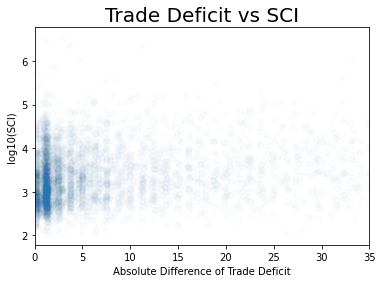

In [9]:
#plotting SCI v/s difference in trade deficit 
import math
pairwise_df_sliced['scaled_sci'] = pd.to_numeric(pairwise_df_sliced['scaled_sci'], errors='coerce')
pairwise_df_sliced['SCI_log10'] = np.log10(pairwise_df_sliced['scaled_sci'])

plt.scatter(pairwise_df_sliced["trade"], pairwise_df_sliced['SCI_log10'], alpha = 0.01)
#changing x axis scale to get a clearer visual
plt.xlim(0, 35)
plt.xlabel('Absolute Difference of Trade Deficit')
plt.ylabel('log10(SCI)')
plt.title('Trade Deficit vs SCI', fontsize=20)
plt.show()